- 모델링에 가장 적합한 확률분포는 정규분포이나 실제로 많은 변수가 특정방향으로 치우쳐 있음
- 한쪽으로 치우친 변수에서 치우친 반대 방향의 값(꼬리부분)들이 이상치처럼 작용할 수 있으므로, 이러한 치우침을 제거해야 함

### 탐색방법 : 왜도(skewness)

- 변수 치우침을 확인하기 가장 적절한 척도로는 왜도가 있음
- 왜도
    - 분포의 비대칭도를 나타내는 통계량
    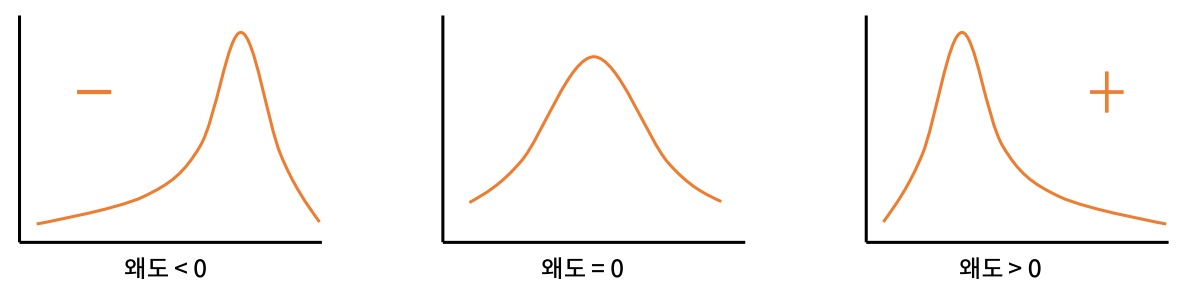
    
    - 왜도의 절대값이 <b> 1.5이상 </b> 이면 치우쳤다고 판단

In [3]:
import pandas as pd
df = pd.read_csv("./데이터/sonar.csv",header=None) # 컬럼명(header)가 없음

In [5]:
df.head()
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [8]:
#컬럼을 구분하기 위해 컬럼명 임의 생성
columns=['band'+str(i) for i in range(1,61)]
columns.append('Y')
# columns

In [10]:
df.columns=columns

In [11]:
df.head(1)

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band52,band53,band54,band55,band56,band57,band58,band59,band60,Y
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R


In [12]:
#
X=df.drop('Y',axis=1)
Y=df['Y']

In [13]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, random_state=4)

In [15]:
# 모든 컬럼의 왜도 확인
# Train_X.skew()
# band4의 왜도가 가장 큼 => 그래프로 확인

<AxesSubplot:>

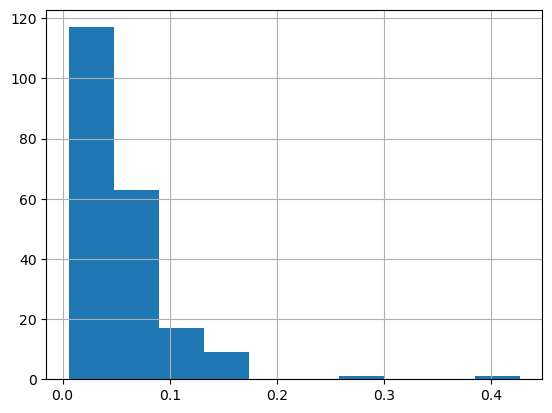

In [17]:
%matplotlib inline
df['band4'].hist()

#### 치우침 제거

In [20]:
# 왜도 기반 치우친 변수 제거
import numpy as np
bias = Train_X.columns[Train_X.skew().abs()>1.5]
# Train_X.skew().abs()>1.5
bias

Index(['band1', 'band2', 'band3', 'band4', 'band5', 'band9', 'band46',
       'band47', 'band50', 'band51', 'band52', 'band55', 'band56', 'band57',
       'band58', 'band59', 'band60'],
      dtype='object')

### 왜도 제거 
- log2변환을 진행함
- np.log2()

<AxesSubplot:>

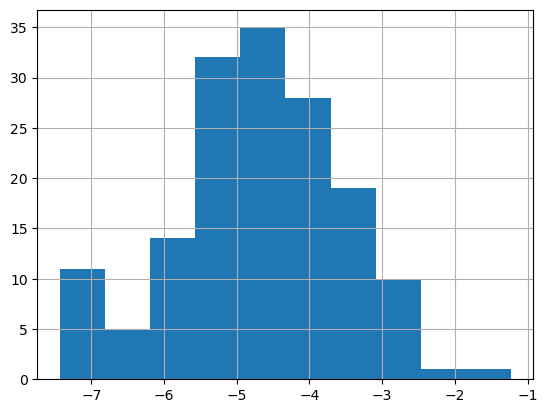

In [25]:
np.log2(Train_X[bias])['band4'].hist()

C:\Users\a\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<AxesSubplot:>

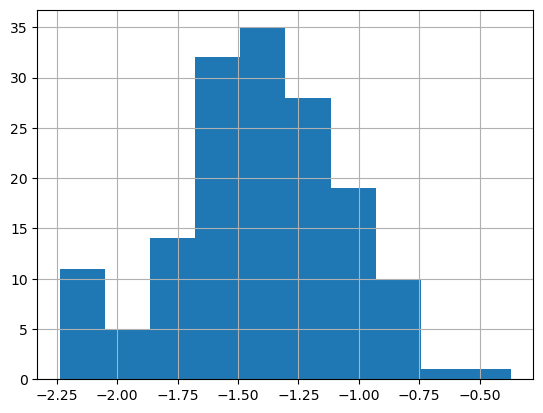

In [26]:
np.log10(Train_X[bias])['band4'].hist()

In [27]:
Train_X[bias]=np.log10(Train_X[bias])

In [28]:
Train_X.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band51,band52,band53,band54,band55,band56,band57,band58,band59,band60
82,-1.388277,-1.375718,-1.241845,-1.886057,-1.737549,0.1019,0.1054,0.1070,-0.637895,0.2259,...,-1.946922,-2.552842,0.0036,0.0105,-1.920819,-2.060481,-2.214670,-2.214670,-2.522879,-2.107905
204,-1.490797,-1.995679,-1.525784,-1.248721,-1.119186,0.0958,0.0990,0.1018,-0.987163,0.2154,...,-2.292430,-2.214670,0.0093,0.0135,-2.200659,-2.200659,-2.468521,-2.494850,-2.207608,-2.173925
12,-2.102373,-2.065502,-2.259637,-1.602060,-1.463442,0.0546,0.0528,0.0958,-0.996109,0.1240,...,-1.759451,-1.754487,0.0127,0.0088,-2.008774,-2.721246,-2.229148,-2.236572,-2.229148,-2.494850
142,-1.279014,-1.249492,-0.913996,-0.918653,-1.609065,0.1022,0.0539,0.0439,-0.639975,0.1632,...,-1.420216,-1.469800,0.0149,0.0335,-1.424812,-1.759451,-1.879426,-1.987163,-1.438899,-1.681937
116,-2.026872,-1.477556,-1.514279,-1.424812,-0.887395,0.1795,0.1909,0.1692,-0.728158,0.1725,...,-1.665546,-1.815309,0.0112,0.0241,-1.785156,-2.259637,-2.107905,-2.259637,-2.040959,-2.173925


### log변환 되어야 하는 데이터
- 왜도가 심한 데이터
- 돈과 관련된 데이터